In [ ]:
# Si necesitan installar o actualizar algun paquete
!pip install formulaic
#!pip install sklearn --upgrade

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures,  MinMaxScaler    # Herramientas de polinomios    # Herramientas de polinomios
from sklearn.model_selection import KFold, train_test_split
from formulaic import Formula, model_matrix
# Paquetes para clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Clustering con $k$-medias

**Ejercicio 1.** Para el siguiente conjunto de datos, identificar a ojo:

1. Cantidad de clusters.
2. Centro de cada cluster.

Guardar los centros hallados en un array, con un centro por fila y graficar los centros junto con los datos.

In [ ]:
# DATOS

# El comando make_blobs genera datos aleatorios en nubes
# En la primera variable X guardamos las coordenadas
# La segunda variable v indica a qué nube pertenece cada dato.

X, v = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

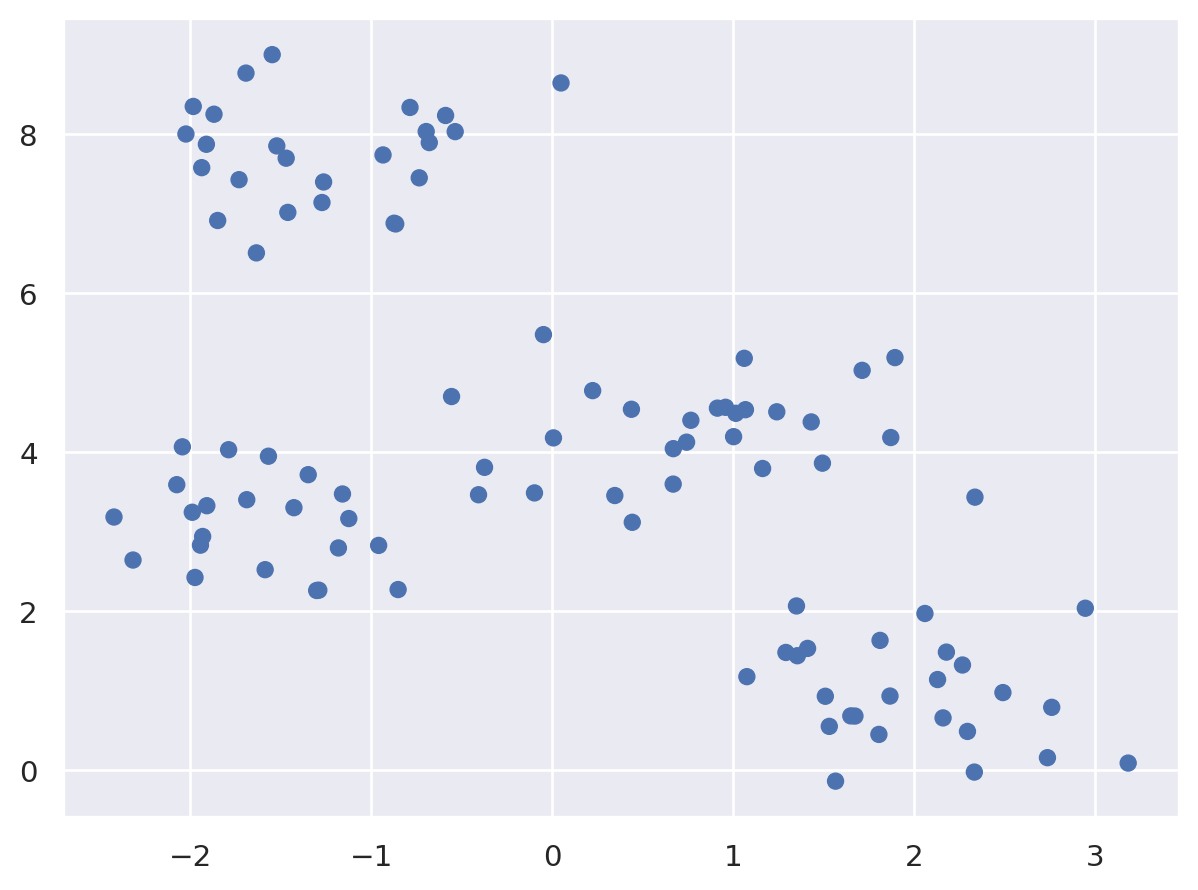

In [ ]:
# Graficamos
(
    so.Plot(x = X[:,0], y = X[:,1])
    .add(so.Dot())
)

In [ ]:
# Fijamos centros para los clusters arbitrariamente
centros = np.array([[-1.5,8], [-1.5,3], [2,1], [1,4]])

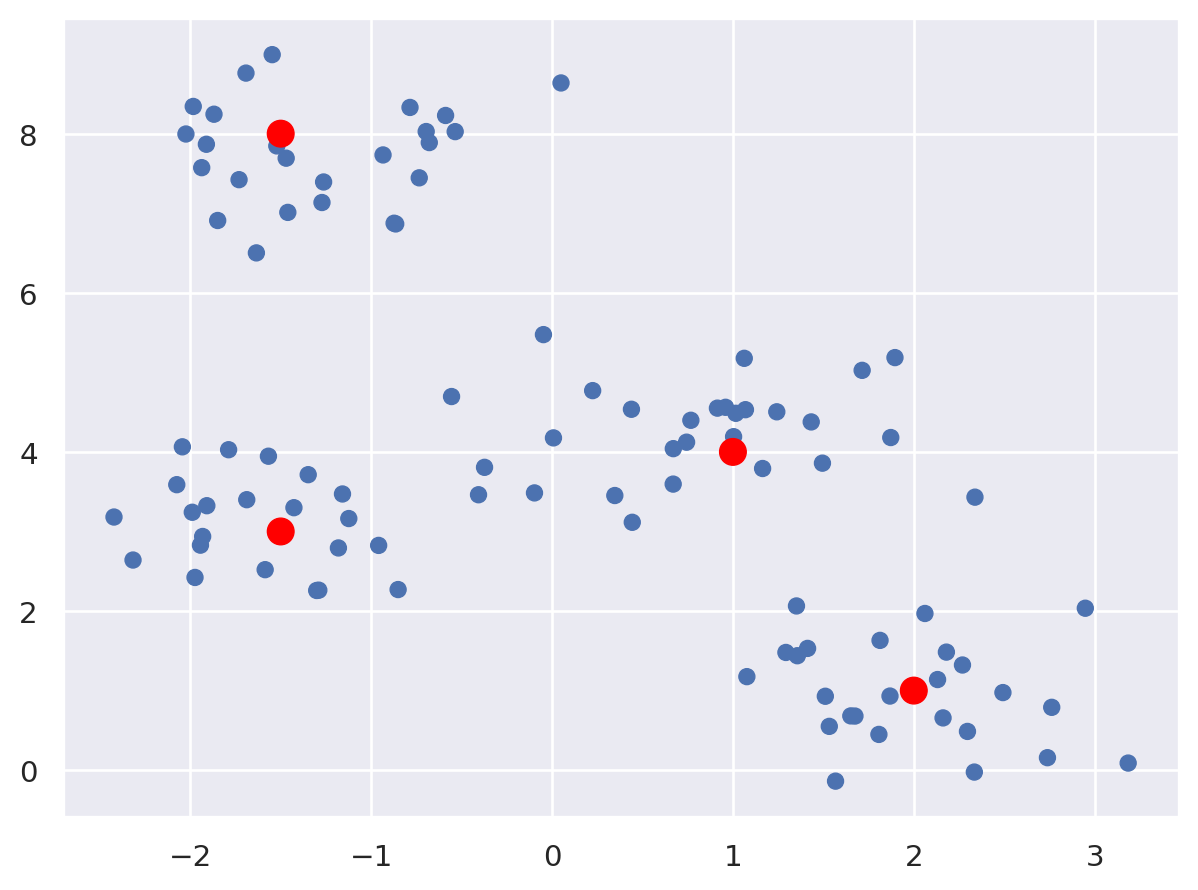

In [ ]:
# Graficamos
(
    so.Plot(x = X[:,0], y = X[:,1])
    .add(so.Dot()) # Puntos
    .add(so.Dot(color = "red", pointsize= 10), x = centros[:,0], y = centros[:,1])  # Centros
)

**Ejercicio 2**

1. Calcular en un array la distancia de cada punto a alguno de los centros.
2. Definir una función que reciba el conjunto de datos y el conjunto de centros y calcule la distancia de cada punto a cada uno de los centros y guarde todas las distancias en un array (cada fila corresponde a las distancias de un dato a cada uno de los centros).
3. Definir una función que reciba el conjunto de datos y el conjunto de centros y devuelva un array de etiquetas, el $i$-ésimo valor del array indica a que cluster pertenece el $i$-ésimo dato.
4. Aplicar la función definida a los datos del Ejercicio 1 y pintar los puntos del gráfico anterior según la etiqueta.
5. Qué canal utilizarían para codificar también la etiqueta provista por `make_blobs`? Coinciden las etiquetas calculadas con las originales?

Desafío **numpy**: realizar la función del ítem 3 sin ningún `for`, mediante una sola línea de código.


In [ ]:
centros[0]

array([-1.5,  8. ])

In [ ]:
# Item 1
datos = X
centro = centros[0]
dist = np.linalg.norm(datos - centro, axis=1)
print(dist)

[4.91003118 0.52398764 4.66149047 4.31707474 4.37972576 4.4800344
 3.97344433 0.82899857 2.91361965 0.30964716 1.30070982 1.14565781
 0.89497151 0.6257532  0.94589234 9.19426429 6.58547518 4.72836858
 5.08137391 8.91541508 5.9670272  0.61095529 4.78361259 8.89328715
 3.96982013 5.48087908 4.34256249 4.25663824 7.44080128 8.3760078
 7.96793015 1.28854601 8.20571827 7.00396183 4.54165441 4.98100291
 0.99429427 7.17919631 1.67564174 5.5980636  3.81318806 4.70166718
 1.50459902 4.44916779 5.19089148 0.59228878 8.04332258 4.69405866
 4.51498753 5.25716439 3.66132515 7.83015443 5.2168623  3.98298516
 5.76672177 0.6520152  0.78713215 8.08032812 7.66856865 0.96490244
 0.99029279 7.09514382 7.76288946 4.41070865 7.09367496 0.93977202
 5.42090429 5.74182184 7.48378024 4.44340652 0.44244103 7.15650059
 4.21076256 0.15555598 4.55779411 5.11094272 4.6683969  4.60447151
 8.41803023 7.29505133 8.69698719 0.78510616 4.28898184 4.11044257
 7.97876426 5.20337115 7.68549817 8.24327634 5.09532475 4.322555

In [ ]:
# Item 2
def distancias_a_centros(datos, centros):
    k = len(centros)
    nDatos = len(datos)
    distMatrix = np.zeros((nDatos, k))

    for i, centro in enumerate(centros):
        dist = np.linalg.norm(datos - centro, axis=1)
        distMatrix[:, i] = dist

    return(distMatrix)

In [ ]:
# La probamos
distancias_a_centros(datos, centros)

array([[4.91003118, 2.24999696, 2.91643779, 0.52224065],
       [0.52398764, 5.02309351, 8.07044113, 5.01098164],
       [4.66149047, 3.23997173, 3.42408194, 0.57390641],
       [4.31707474, 2.99064921, 3.65130831, 0.53518256],
       [4.37972576, 3.7992302 , 4.03533142, 1.24959882],
       [4.4800344 , 2.50893702, 3.36560095, 0.28387265],
       [3.97344433, 1.19476869, 5.07332565, 3.04431057],
       [0.82899857, 4.95652562, 7.39048931, 4.23487676],
       [2.91361965, 2.86909483, 4.92048368, 1.80849667],
       [0.30964716, 4.69192993, 7.53789696, 4.44177508],
       [1.30070982, 3.91723243, 6.52725773, 3.41833606],
       [1.14565781, 3.92409294, 7.05135375, 4.0710239 ],
       [0.89497151, 4.14089521, 6.95256838, 3.87129599],
       [0.6257532 , 4.76622379, 7.34418454, 4.20395929],
       [0.94589234, 4.51033911, 7.00083134, 3.85671578],
       [9.19426429, 5.5158479 , 1.4948262 , 4.48004151],
       [6.58547518, 3.00114097, 1.2459688 , 1.96779241],
       [4.72836858, 1.48430756,

In [ ]:
# Item 3
def calcular_etiquetas(datos, centros):
    distMatrix = distancias_a_centros(datos, centros)
    etiquetas = np.argmin(distMatrix, axis=1)
    return(pd.Series(etiquetas).astype("str"))  # Convertimos los enteros a strings

In [ ]:
etiquetas = calcular_etiquetas(datos, centros)
display(etiquetas)

,0
0,3
1,0
2,3
3,3
4,3
...,...
95,0
96,0
97,1
98,0


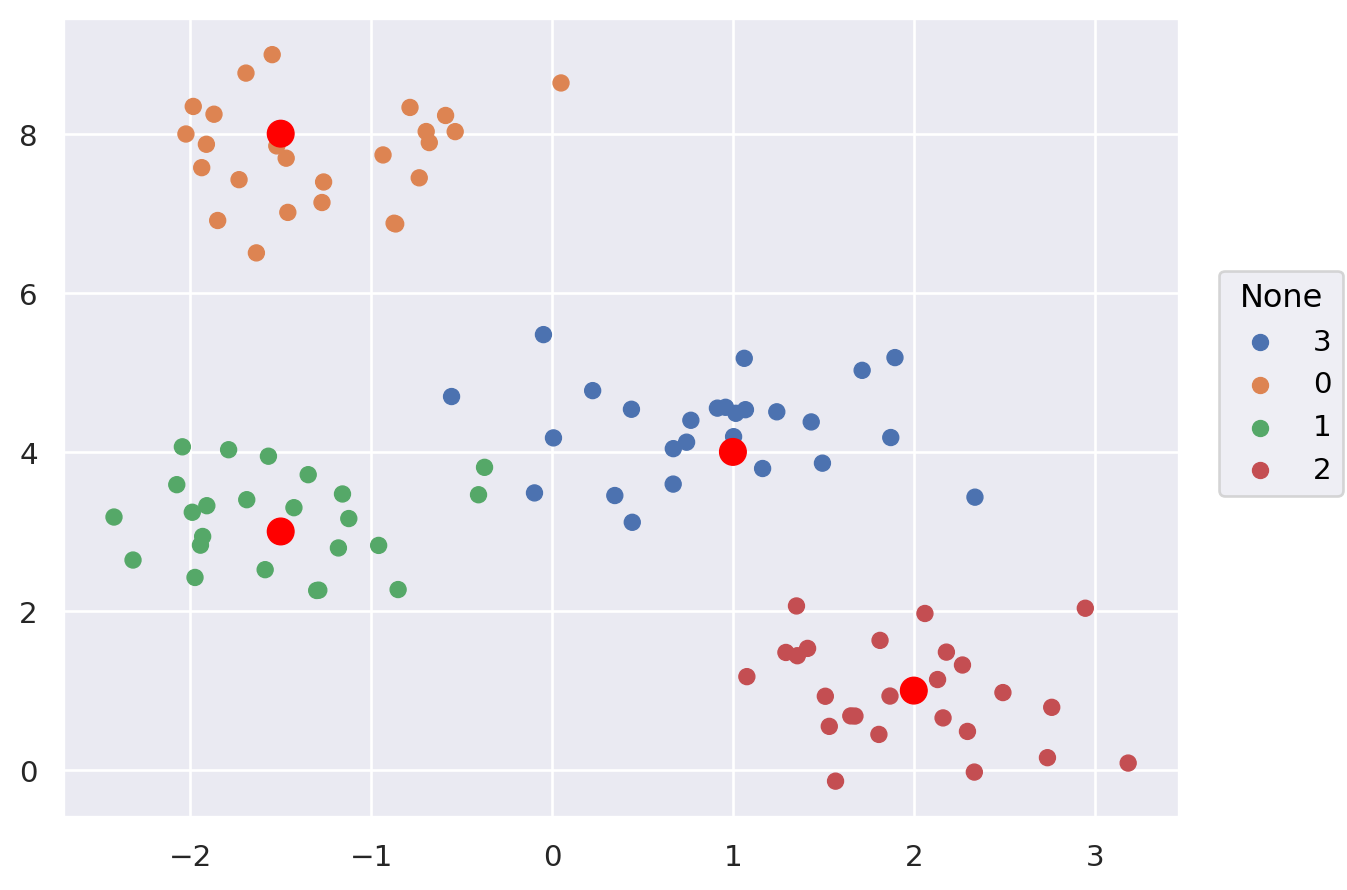

In [ ]:
# Item 4
etiquetas = calcular_etiquetas(datos, centros)
(
    so.Plot(x = X[:,0], y = X[:,1])
    .add(so.Dot(), color = etiquetas)
    .add(so.Dot(color = "red", pointsize= 10), x = centros[:,0], y = centros[:,1])
)

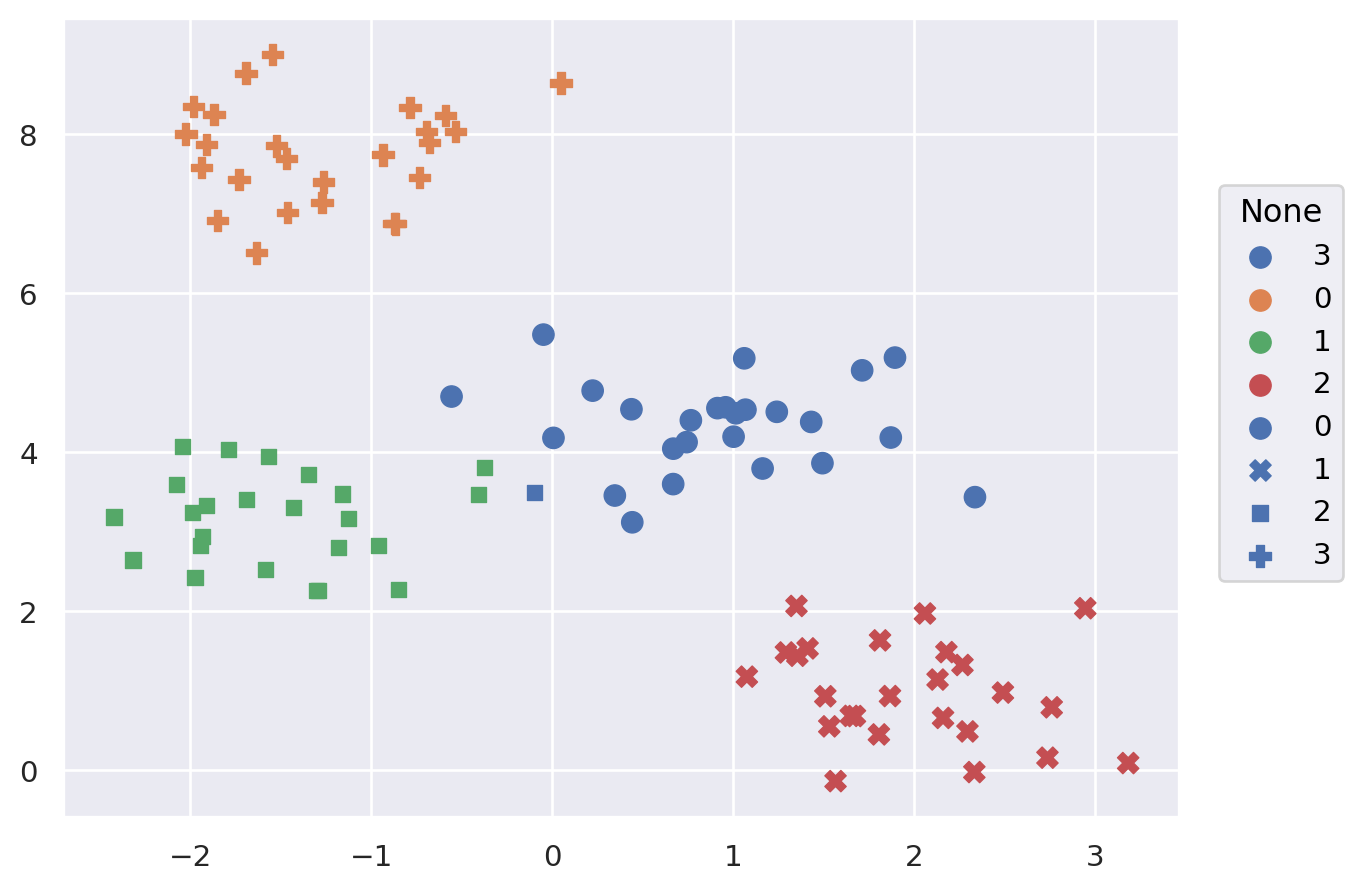

In [ ]:
# Graficamos
(
    so.Plot(x = X[:,0], y =  X[:,1], color = etiquetas, marker = v)
    .add(so.Dot(pointsize = 8))
    #.add(so.Dots(color = "red", pointsize= 10), x = centros[:,0], y = centros[:,1])
)

**Ejercicio 3.**

1. Definir una función que reciba un conjunto de datos y un array de etiquetas y calcule los centros de cada cluster.
2. Aplicar la función a los datos del ejercicio anterior, guardando los centros en un vector nuevo.
3. Graficar los datos, los centros nuevos y los centros viejos.


In [ ]:
for i, etiqueta in enumerate(etiquetas.unique()):
    print(i)

0
1
2
3


In [ ]:
X[1,:]

array([-2.02396992,  7.99569054])

In [ ]:
# Item 1
# Lo hacemos primero sin meterlo dentro de una función
centrosNuevos = np.zeros((4,2))
for i, etiqueta in enumerate(etiquetas.unique()):
    cluster = X[etiquetas == etiqueta, :]
    centro = cluster.mean(axis=0)
    centrosNuevos[i] = centro

display(centrosNuevos)


array([[ 0.87673717,  4.2964758 ],
       [-1.27208964,  7.74944718],
       [-1.52704861,  3.14337865],
       [ 1.97918933,  0.97920012]])

In [ ]:
# Metemos el código en una función
def calcular_centros(datos, etiquetas):
    centros = np.zeros((4,2))
    for i, etiqueta in enumerate(etiquetas.unique()):
        cluster = X[etiquetas == etiqueta, :]
        centro = cluster.mean(axis=0)
        centros[i] = centro
    return(centros)


In [ ]:
# Item 2
centros = np.array([[-1.5, 3], [-1, 8], [1,4], [2,1]])
etiquetas = calcular_etiquetas(datos, centros)

centrosNuevos = calcular_centros(datos, etiquetas)
centrosNuevos

array([[ 0.87673717,  4.2964758 ],
       [-1.27208964,  7.74944718],
       [-1.52704861,  3.14337865],
       [ 1.97918933,  0.97920012]])

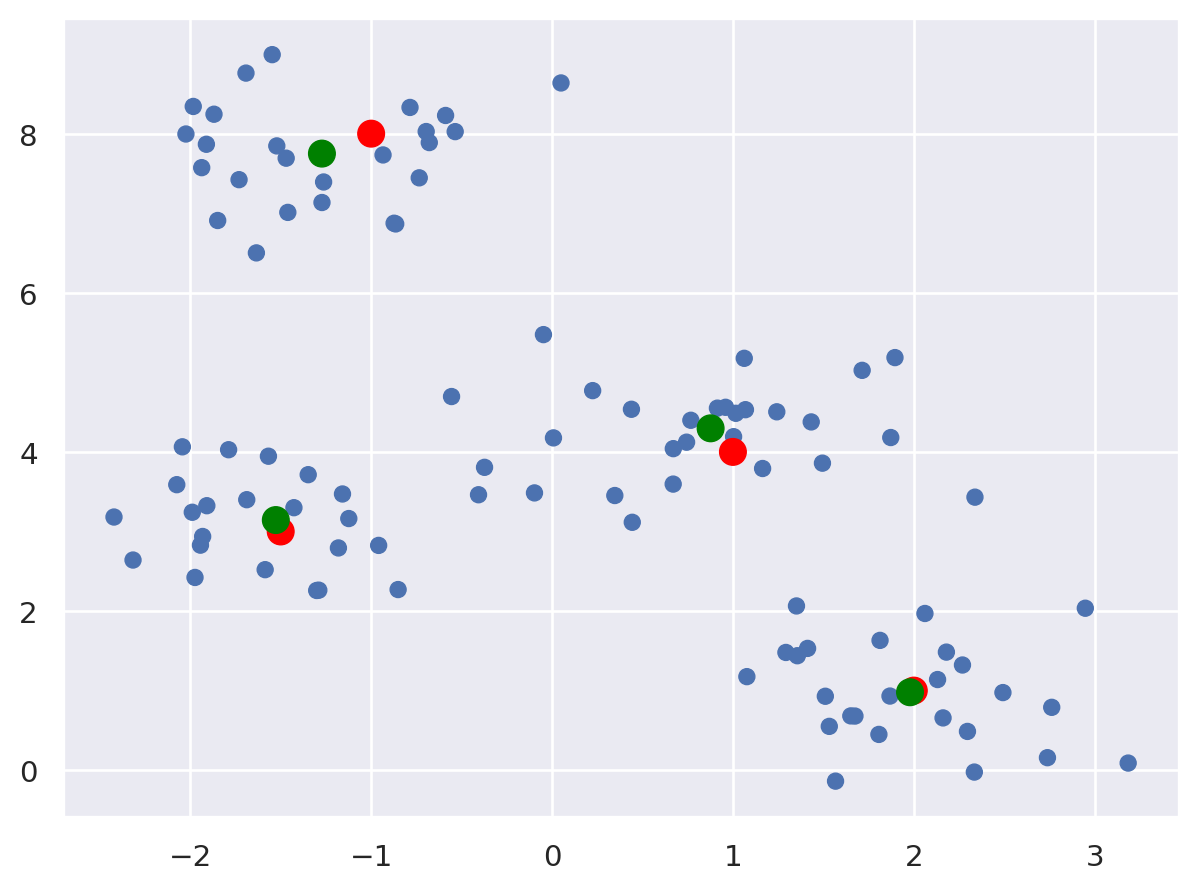

In [ ]:
# Item 3
# Graficamos
(
    so.Plot(x = X[:,0], y = X[:,1])
    .add(so.Dot())
    .add(so.Dot(color = "red", pointsize= 10), x = centros[:,0], y = centros[:,1])
    .add(so.Dot(color = "green", pointsize= 10), x = centrosNuevos[:,0], y = centrosNuevos[:,1])
)

**Ejercicio 4**

1. Escribir un programa que reciba un conjunto de datos, un conjunto de centros y un entero positivo $n$, y aplique $n$ iteraciones del algoritmo $k$-means.
2. Correr el programa con los datos anteriores y graficar los resultados finales.
3. Cambiaron las etiquetas con respecto a las que calculamos la primera vez?
4. Elegir un nuevo conjunto de centros iniciales que no correspondan visualmente a los centros de los clusters y correr nuevamente el algoritmo.

**Extras:**
1. Modificar la función para elija un conjuntos inicial de centros al azar entre los datos provistos.
1. Modificar el algoritmo para que se detenga si las etiquetas no se modifican de un paso al siguiente.

In [ ]:
# Item 1
def kmedias(datos, centros, n):
    centros_nuevos = centros.copy()
    for i in range(n):
        etiquetas = calcular_etiquetas(datos, centros)
        centros_nuevos = calcular_centros(datos, etiquetas)
    etiquetas = calcular_etiquetas(datos, centros_nuevos)
    return(etiquetas)

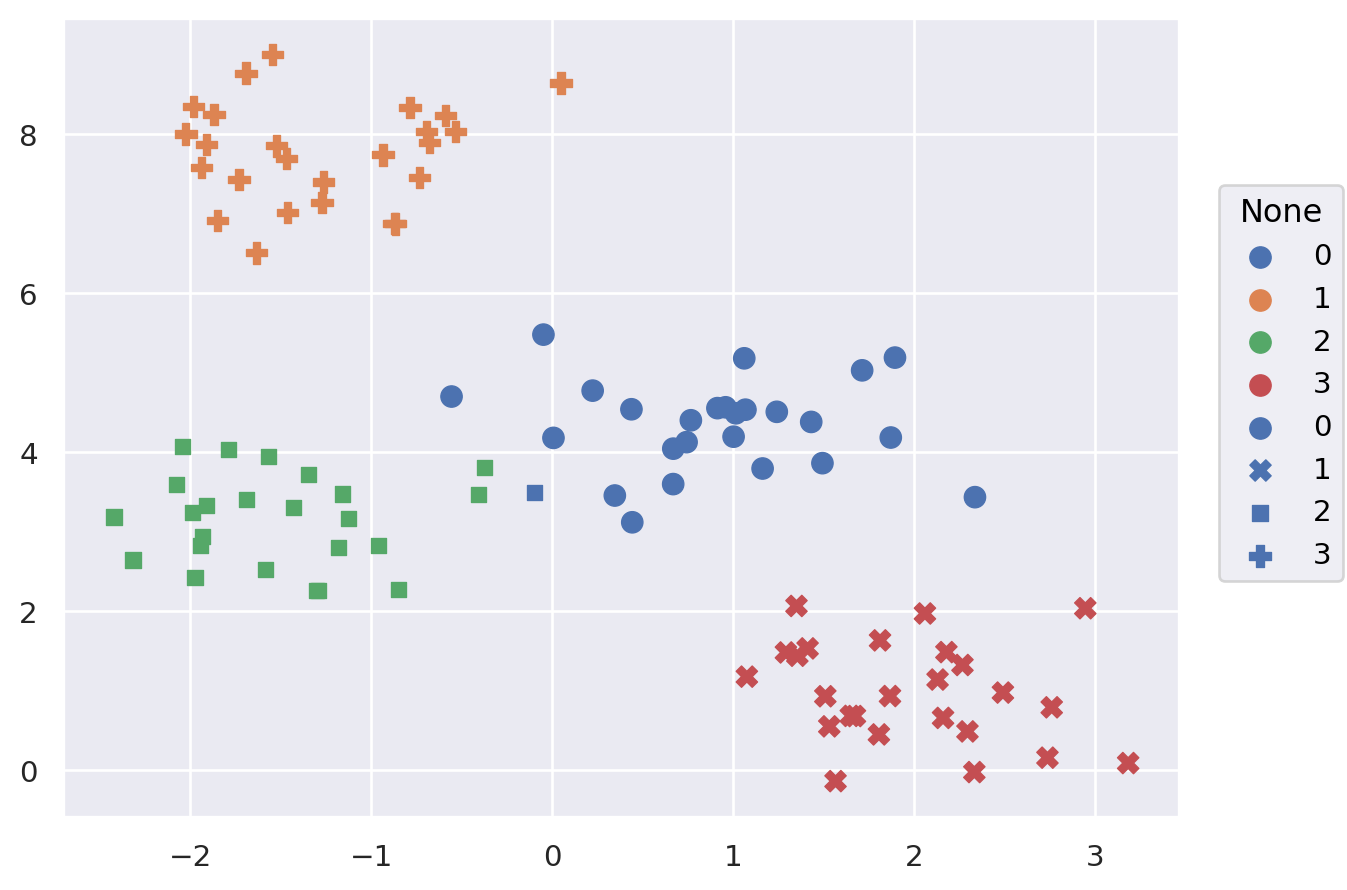

In [ ]:
# Item 2
etiquetas = kmedias(datos, centros, 10)

# Graficamos
(
    so.Plot(x = X[:,0], y =  X[:,1], color = etiquetas, marker = v)
    .add(so.Dot(pointsize = 8))
    #.add(so.Dots(color = "red", pointsize= 10), x = centros[:,0], y = centros[:,1])
)

In [ ]:
# Item 3 - Comparar con el grafico anterior

In [ ]:
# Item 4
# Centros al azar
indices = np.random.choice(datos.shape[0], 4, replace=False)
centrosRandom = X[indices, :]
centrosRandom

array([[-2.04363942,  4.06392123],
       [-0.04749204,  5.47425256],
       [-0.69574048,  8.02669661],
       [-1.94364473,  2.82810154]])

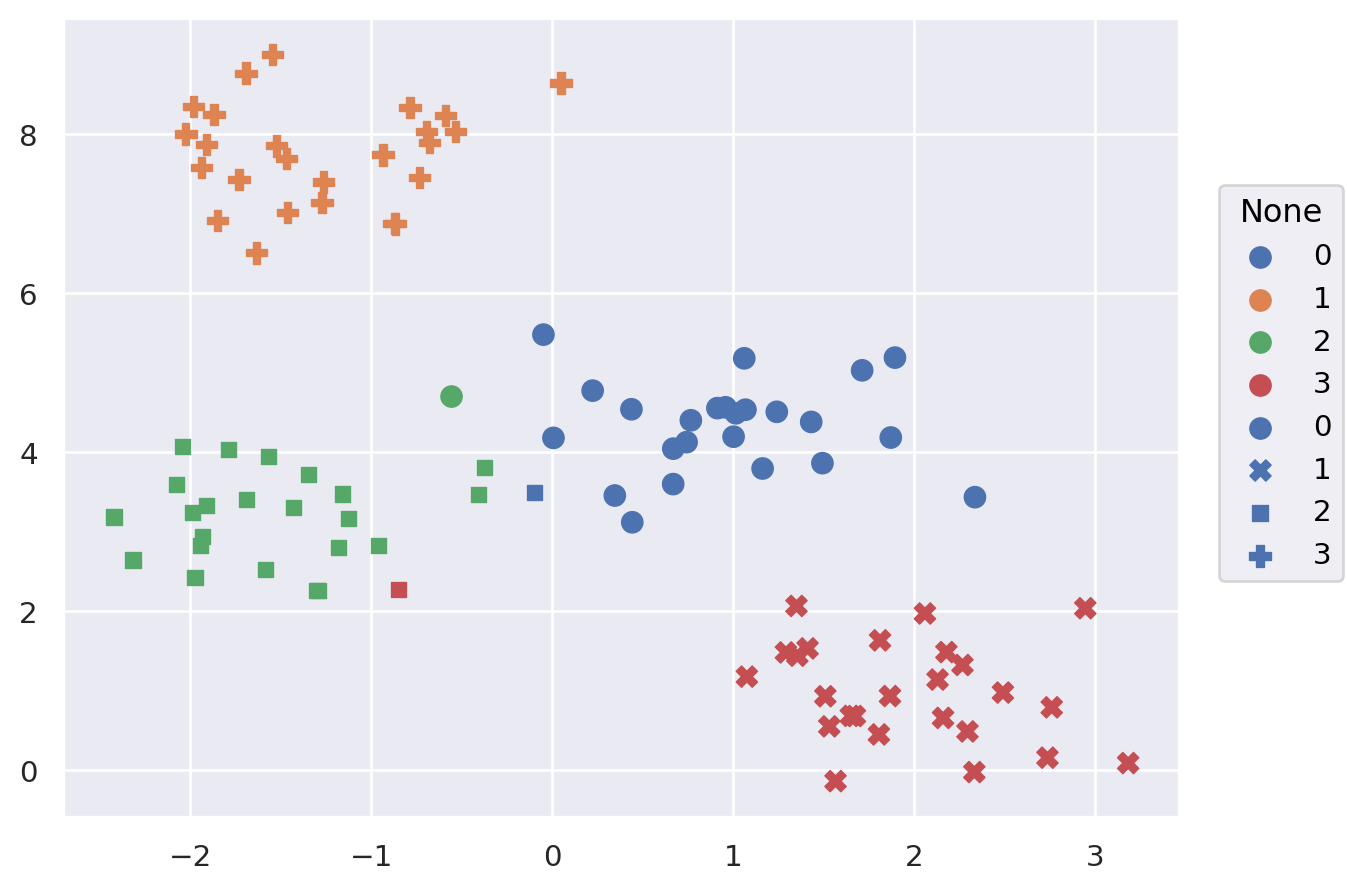

In [ ]:
etiquetas = kmedias(datos, centrosRandom, 40)

# Graficamos
(
    so.Plot(x = X[:,0], y =  X[:,1], color = etiquetas, marker = v)
    .add(so.Dot(pointsize = 8))
    #.add(so.Dots(color = "red", pointsize= 10), x = centros[:,0], y = centros[:,1])
)

**Ejercicio 5**

Como vimos en el último ejercicio, k-medias es sensible a los centros iniciales que tomamos.

Una estrategia usual es repetir el algoritmo varias veces tomando distintos puntos iniciales como centros, y luego quedarse con el clustering de menos WCSS (suma de cuadrados intra-cluster).

1. Utilizando los datos de los ejercicios anteriores, asignar los clusters usando la función k-means de sklearn.
2. Graficar.

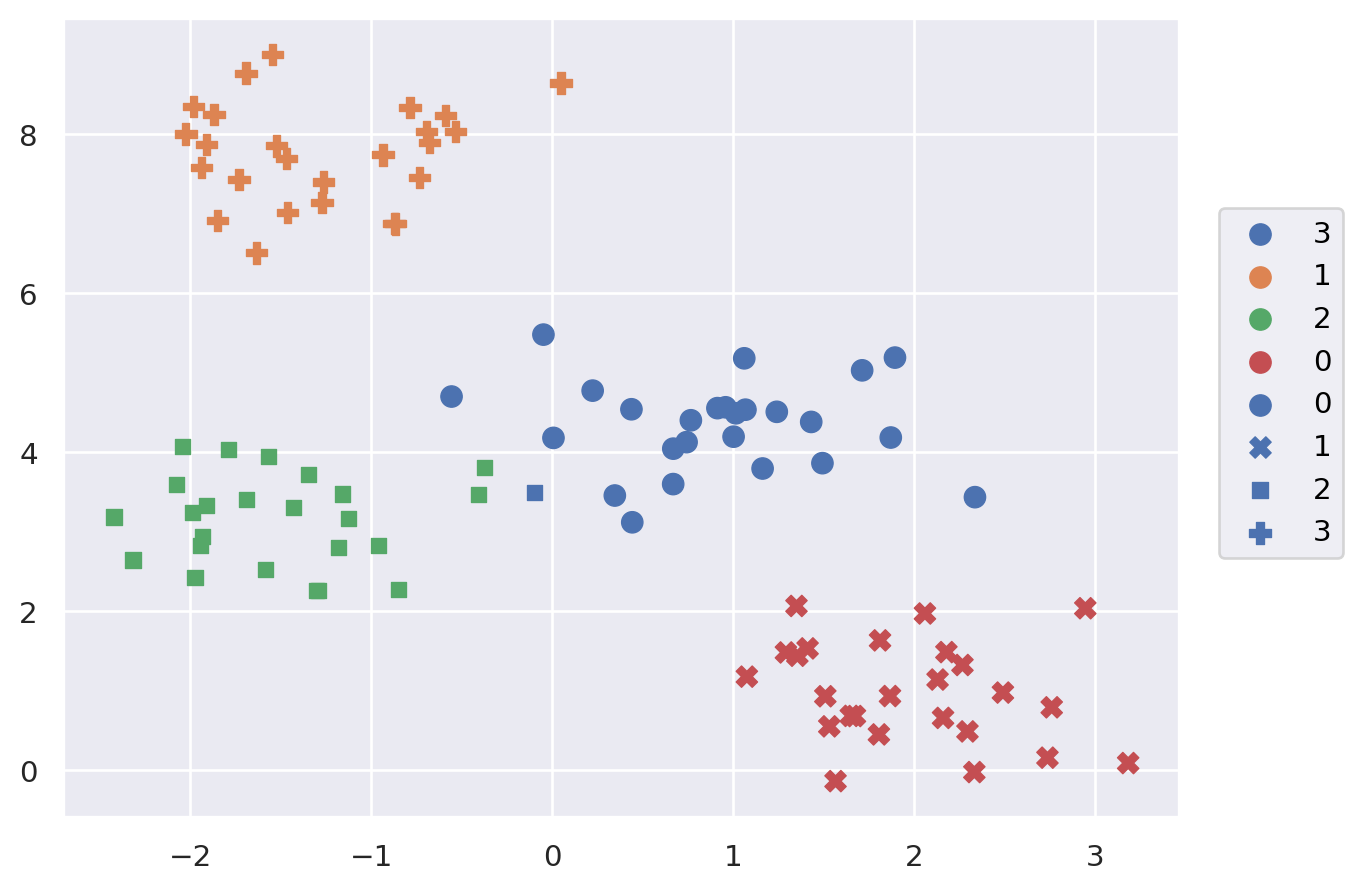

In [ ]:
kmeans = KMeans(n_clusters=4)   # Creamos el objeto de la clase KMeans pero no hacemos nada todavía
# Asignamos cada observación a un cluster
etiquetas = kmeans.fit_predict(datos)

# Graficamos
(
    so.Plot(x = X[:,0], y =  X[:,1], color = etiquetas.astype(str), marker = v)
    .add(so.Dot(pointsize = 8))
    #.add(so.Dots(color = "red", pointsize= 10), x = centros[:,0], y = centros[:,1])
)

**Ejercicio 6.** Utilizando los datos de pingüinos:

1. Graficar `bill_depth_mm` en función de `bill_length_mm`. Cuántos clusters se observan?
2. Agrupar los datos en 3 clusters por $k$-medias utilizando solo las variables `bill_length_mm` y `bill_depth_mm`.
3. Repetir el gráfico asignando colores según el cluster. Los 3 clusters hallados se corresponden con lo observado en el punto 1?
4. Repetir el agrupamiento escalando previamente los datos por MinMax. Mejoran los clusters?

In [ ]:
# Eliminamos datos faltantes y reseteamos los índices, para no tener problemas al graficar
penguins = sns.load_dataset("penguins").dropna().reset_index(drop=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


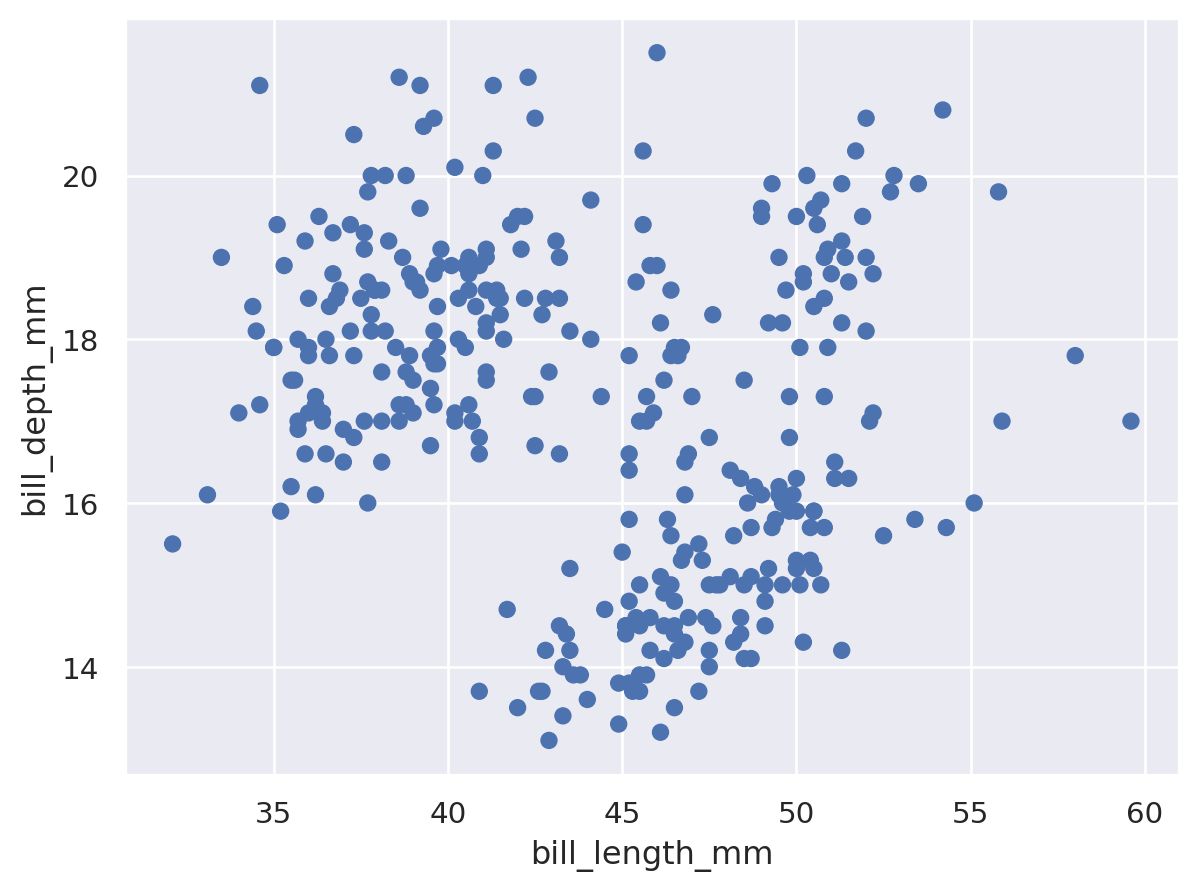

In [ ]:
# Item 1
(
    so.Plot()
    .add(so.Dot(), data = penguins, x = "bill_length_mm", y = "bill_depth_mm")
)

In [ ]:
# Item 2
kmeans = KMeans(n_clusters=3)
# Asignamos cada observación a un cluster
cluster = kmeans.fit_predict(penguins[["bill_length_mm", "bill_depth_mm"]])

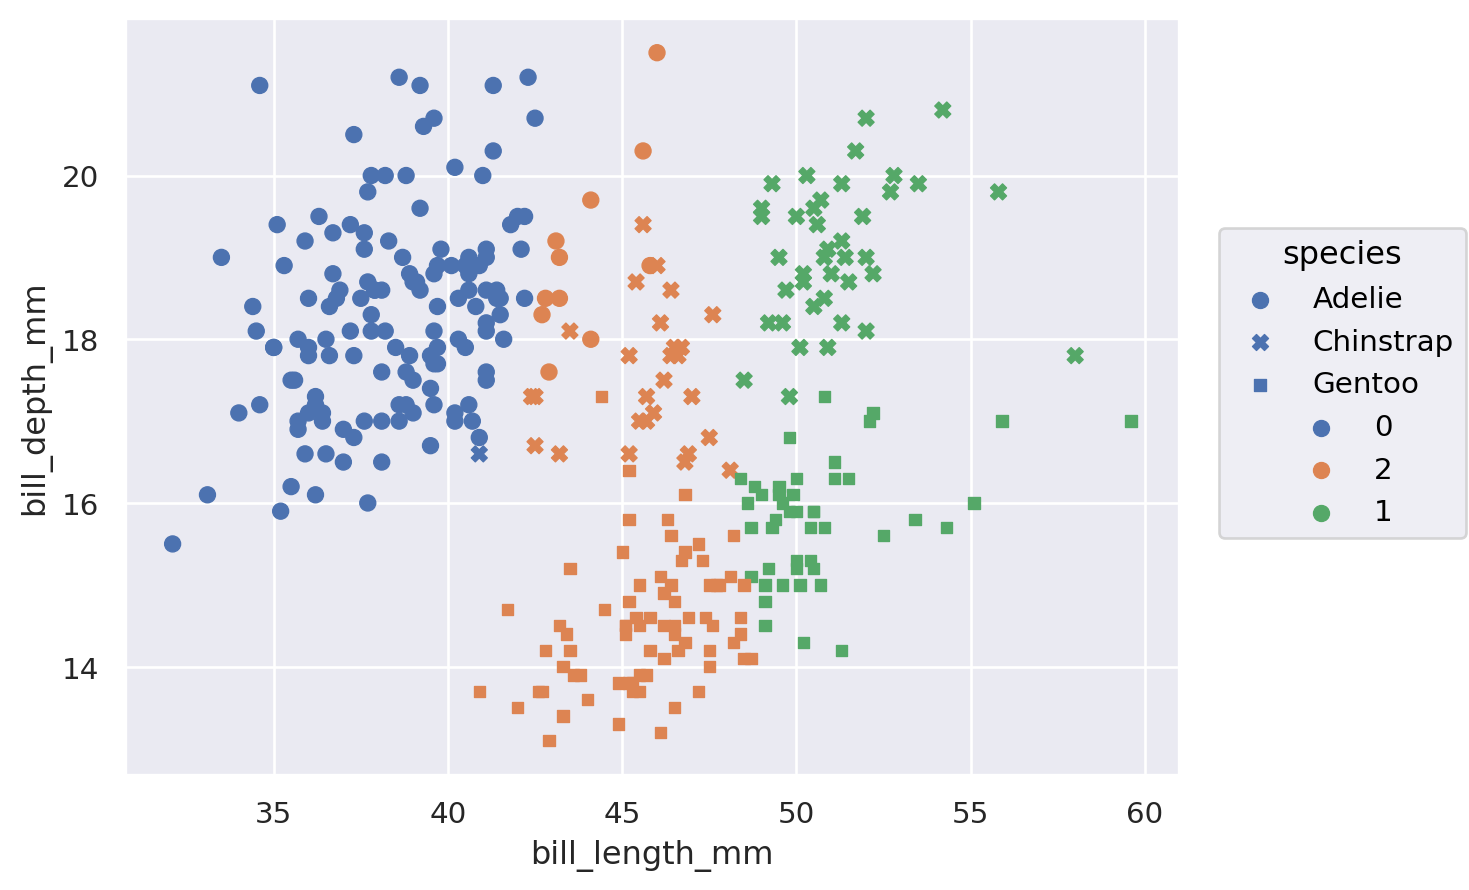

In [ ]:
# Item 3
(
    so.Plot()
    .add(so.Dot(), data = penguins, x = "bill_length_mm", y = "bill_depth_mm", marker = "species", color = cluster.astype("str"))
    #.add(so.Dot(color = "red", pointsize = 10), x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1])
)

Los graficos estan medio gaga, normalizamos para que el kmeans funcione mejor (reducia a

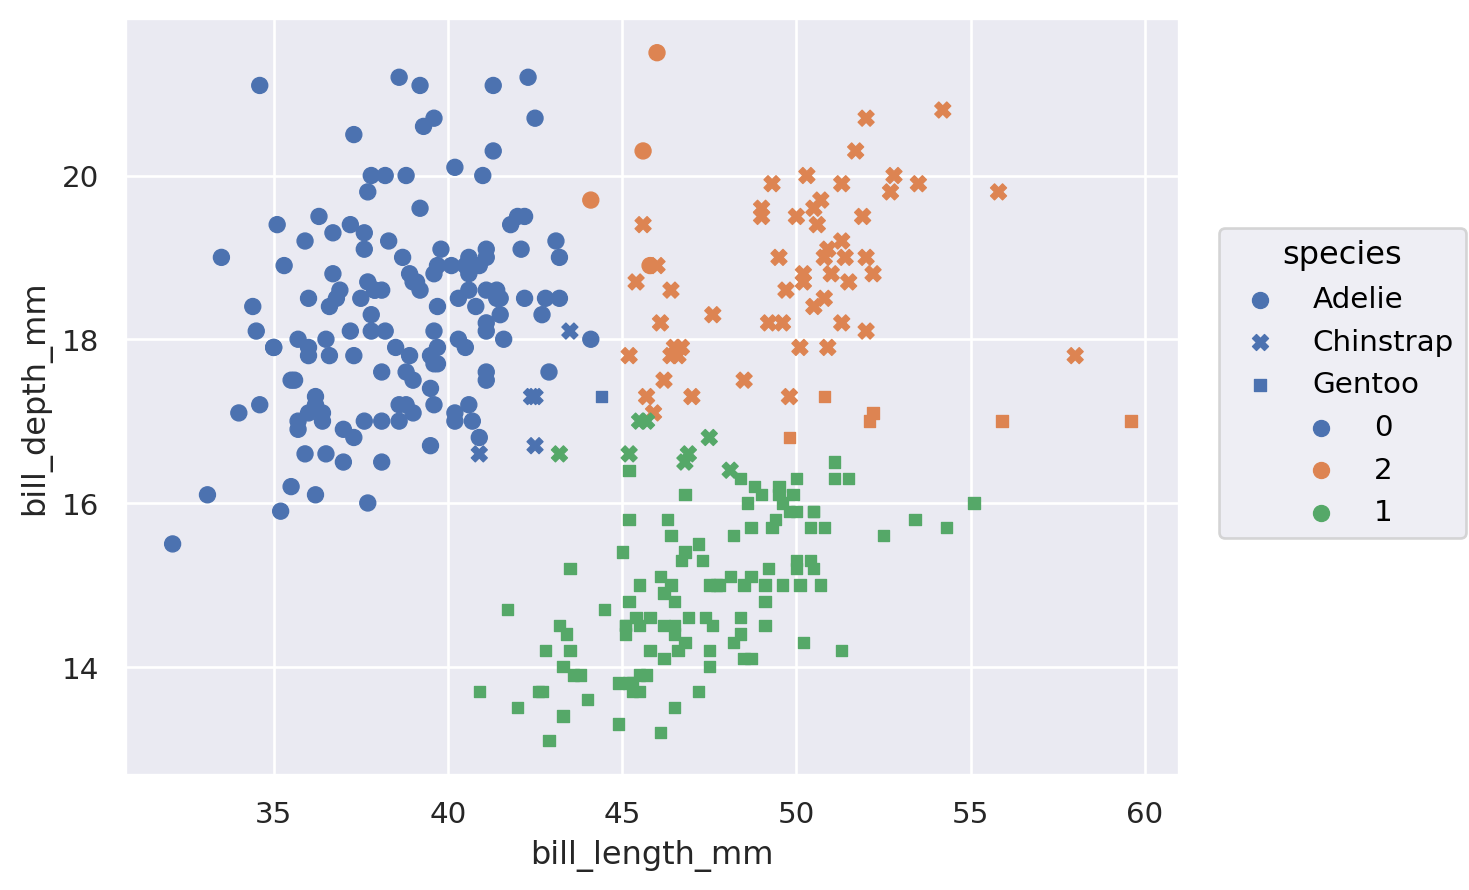

In [ ]:
# Item 4
scaler = MinMaxScaler().set_output(transform="pandas")
data = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
data = scaler.fit_transform(X = data)
kmeans = KMeans(n_clusters=3)

# Asignamos cada observación a un cluster
cluster = kmeans.fit_predict(data[["bill_length_mm", "bill_depth_mm"]])

# Graficamos
(
    so.Plot()
    .add(so.Dot(), data = penguins, x = "bill_length_mm", y = "bill_depth_mm", marker = "species", color = cluster.astype("str"))
    #.add(so.Dot(color = "red", pointsize = 10), x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1])
)

In [ ]:
kmeans.cluster_centers_

array([[0.24378378, 0.61357786],
       [0.64173677, 0.66098081],
       [0.55029276, 0.22074253]])

**Ejercicio 6.** (tarea)

1. Repetir el ejercicio anterior utilizando todas las variables numéricas para realizar el agrupamiento.
2. Elegir un par de variables y graficarlas, asignando colores según el cluster.
3. Mejora el agrupamiento al incluir todas las variables?